In [1]:
import sys
import os

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
path_to_project = '/mnt/0A2AAC152AABFBB7/data/gwasResult/'
gwas_file = 'annotated_normalized_combined_R2_0.3.dose_step2_sex_pheno-glm.PHENO1.glm.logistic.hybrid'
ref_file = '1000genomes_sas_freq.afreq'

In [3]:
df_gwas = pd.read_csv(os.path.join(path_to_project, gwas_file), sep='\t')
df_ref = pd.read_csv(os.path.join(path_to_project, ref_file), sep='\t')

In [4]:
df_gwas = df_gwas.drop(columns=['PROVISIONAL_REF?', 'OMITTED', 'FIRTH?', 'TEST', 'N', 'BETA', 'SE',	'L95', 'U95', 'Z_STAT'], inplace=False)
df_gwas.head(10)

,#CHROM,POS,ID,REF,ALT,A1,A1_FREQ,P,ERRCODE
0,1,727242,rs61769339,G,A,A,0.181916,0.355696,.
1,1,727717,rs61769340,G,C,C,0.764772,0.517232,.
2,1,730869,rs200188737,C,T,T,0.019785,0.510707,.
3,1,732369,rs1315713498,G,A,A,0.012802,0.741994,.
4,1,740738,rs146067153,C,T,T,0.026634,0.816063,.
5,1,758377,rs546155830,A,C,C,0.010161,0.800819,.
6,1,758443,rs61769351,G,C,C,0.185900,0.500839,.
7,1,769257,rs142559957,G,A,A,0.055013,0.174892,.
8,1,771265,rs74879860,A,C,C,0.021665,0.259828,.
9,1,771516,rs868287850,G,A,A,0.022426,0.082361,.


In [5]:
df_ref = df_ref.drop(columns=['PROVISIONAL_REF?', 'OBS_CT'], inplace=False)
df_ref.head(10)

,#CHROM,ID,REF,ALT,ALT_FREQS
0,1,rs2100355088,C,T,0.001953
1,1,rs1570503875,G,T,0.001953
2,1,rs2100467282,T,C,0.001953
3,1,rs1642278192,A,C,0.002930
4,1,rs2100548072,T,C,0.000977
5,1,rs185127847,T,A,0.009766
6,1,rs1415481957,G,A,0.001953
7,1,rs61769339,G,A,0.176758
8,1,rs61769340,G,C,0.792969
9,1,rs1380371562,C,T,0.001953


In [6]:
df = pd.merge(df_gwas, df_ref, on=['ID', 'REF', 'ALT'], how='inner')
del df_gwas, df_ref
df.shape

(8201615, 11)

In [7]:
df = df[(df['ALT_FREQS'] > 0.01) & (df['A1_FREQ'] > 0.01)].reset_index(drop=True)

In [9]:
df.to_csv(os.path.join(path_to_project, 'join_filtered_gwas_ref.csv'), index=False)
df.shape


(7981331, 11)

In [3]:
df = pd.read_csv(os.path.join(path_to_project, 'join_filtered_gwas_ref.csv'))
df

,#CHROM_x,POS,ID,REF,ALT,A1,A1_FREQ,P,ERRCODE,#CHROM_y,ALT_FREQS
0,1,727242,rs61769339,G,A,A,0.181916,0.355696,.,1,0.176758
1,1,727717,rs61769340,G,C,C,0.764772,0.517232,.,1,0.792969
2,1,730869,rs200188737,C,T,T,0.019785,0.510707,.,1,0.024414
3,1,740738,rs146067153,C,T,T,0.026634,0.816063,.,1,0.028320
4,1,758377,rs546155830,A,C,C,0.010161,0.800819,.,1,0.015625
...,...,...,...,...,...,...,...,...,...,...,...
7981326,22,50790460,rs201882178,T,G,G,0.251567,0.424731,.,22,0.293945
7981327,22,50790482,rs80012748,G,A,A,0.201835,0.202881,.,22,0.251953
7981328,22,50791377,rs9616985,T,C,C,0.057565,0.766148,.,22,0.058594
7981329,22,50795915,rs374867791,G,T,T,0.017771,0.216359,.,22,0.042969


<Axes: xlabel='ALT_FREQS', ylabel='A1_FREQ'>

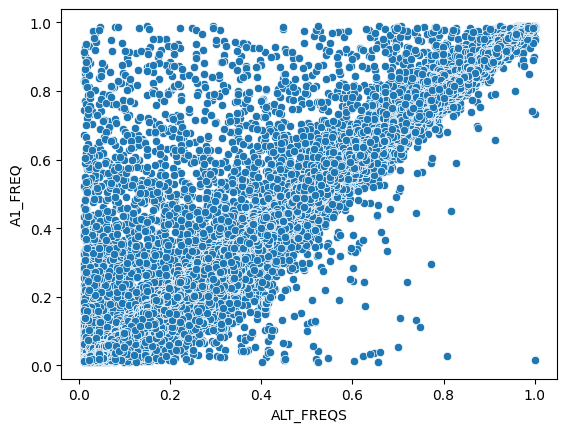

In [4]:
sns.scatterplot(x='ALT_FREQS', y='A1_FREQ', data=df)